In [1]:
from utils.dataset import *
from utils.plain import*
from utils.highwayclass import *
from utils.utilsProject import *
from utils.highwayFC import *

In [2]:
(ds_train, ds_test), ds_info=loadData("mnist")
ds_train=prepareTrainDataset(ds_train,ds_info)
ds_test=prepareTestDataset(ds_test)

In [3]:
data,label=convertDatasetNumpy(ds_train)

In [4]:
initializer=tf.keras.initializers.GlorotUniform()

In [19]:
plainNetwork=PlainModel((28,28),50,50,"relu",initializer,10)

In [20]:
highwayNetwork=highwayFC_Model((28,28),50,50,"tanh",False,-2,initializer,10)

In [21]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.1,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

plainNetwork.model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9,nesterov=False),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [22]:
resPlain=plainNetwork.model.fit(ds_train,epochs=20)

Epoch 1/20
469/469 [==============================] - 6s 8ms/step - loss: 2.3033 - sparse_categorical_accuracy: 0.1053
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1091
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.1088
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.1101
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1086
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3034 - sparse_categorical_accuracy: 0.1094
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3030 - sparse_categorical_accuracy: 0.1077
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 2.3034 - sparse_categorical_accuracy: 0.1072
Epoch 9/20
469/469 [============================

In [23]:
mean,variance=activationMeanStdLayerModel(plainNetwork.model,ds_test,[*range(1,50,1)])

/content/utils/utilsProject.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  activationArray=np.array(activationArray)


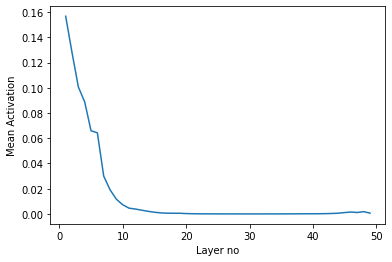

In [24]:
plotmeanActivation(mean,50)

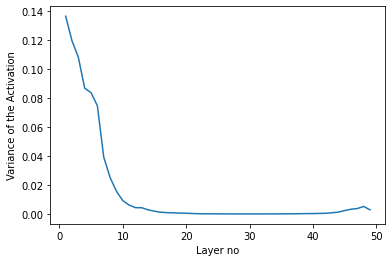

In [25]:
plotstdActivation(variance,50)

In [26]:
#You can train the network using custom train function. However, it is not recommended since it is very slow compared to TF fit function. Just for debugging purposes.
plainNetwork.init_loss()
plainNetwork.init_optimizer(0.001,0.9)
normGradient=plainNetwork.train(3,ds_train)

/content/utils/plain.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  grads=np.array(grads)


Loss: 2.2988204956054688 Accuracy: 0.1171875
Loss: 2.299532413482666 Accuracy: 0.11478960514068604
Loss: 2.3018956184387207 Accuracy: 0.11326181888580322
Loss: 2.3068270683288574 Accuracy: 0.11332017928361893
Loss: 2.3117918968200684 Accuracy: 0.11274547874927521
EPOCH: 0 COMPLETED
###########
Loss: 2.3019514083862305 Accuracy: 0.11239355802536011
Loss: 2.305389165878296 Accuracy: 0.11286474019289017
Loss: 2.2953381538391113 Accuracy: 0.11274029314517975
Loss: 2.294728994369507 Accuracy: 0.11236400157213211
Loss: 2.303555727005005 Accuracy: 0.11221794784069061
EPOCH: 1 COMPLETED
###########
Loss: 2.28389573097229 Accuracy: 0.11244672536849976
Loss: 2.313952922821045 Accuracy: 0.11277534067630768
Loss: 2.3044443130493164 Accuracy: 0.11271683871746063
Loss: 2.305230140686035 Accuracy: 0.11232715845108032
Loss: 2.3015618324279785 Accuracy: 0.11264941841363907
EPOCH: 2 COMPLETED
###########


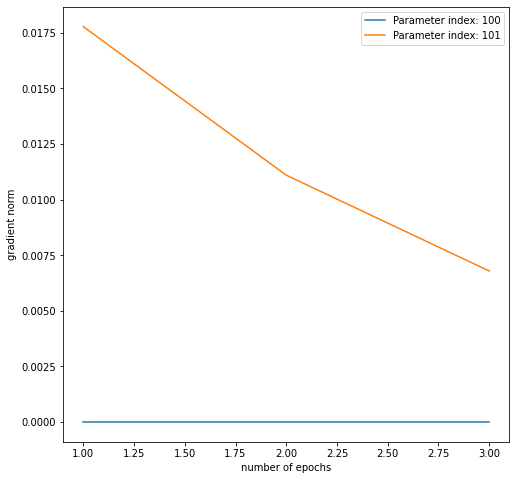

In [27]:
#if custom train function is used, you can use this function.
plotMultipleGradientOverEpoch(normGradient,[100,101])

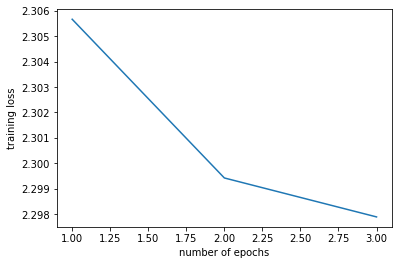

In [28]:
#if custom train function is used, you can use this function.
plainNetwork.plotTrainingLoss()

In [29]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.1,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

highwayNetwork.model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9,nesterov=False),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [30]:
resHighway=highwayNetwork.model.fit(ds_train,epochs=20)

Epoch 1/20
469/469 [==============================] - 16s 16ms/step - loss: 2.3023 - sparse_categorical_accuracy: 0.1071
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 2.0585 - sparse_categorical_accuracy: 0.2275
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.4619 - sparse_categorical_accuracy: 0.8912
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2561 - sparse_categorical_accuracy: 0.9387
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1797 - sparse_categorical_accuracy: 0.9548
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1384 - sparse_categorical_accuracy: 0.9639
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9678
Epoch 8/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1026 - sparse_categorical_accuracy: 0.9727
Epoch 9/20
469/469 [===================

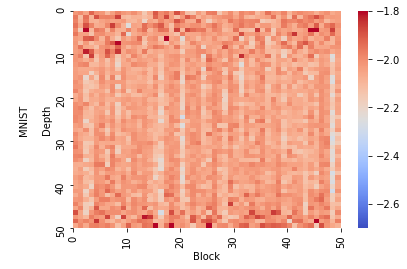

In [31]:
highwayNetwork.plotHeatMapBias("MNIST",-2.7,-1.8)

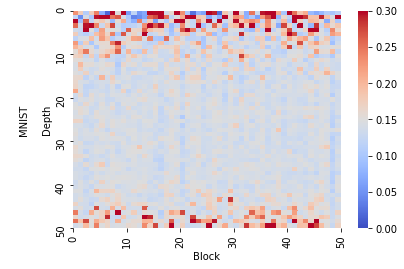

In [32]:
meantransformGateOutputHeatMap(highwayNetwork.model,data,"MNIST",0,0.3)

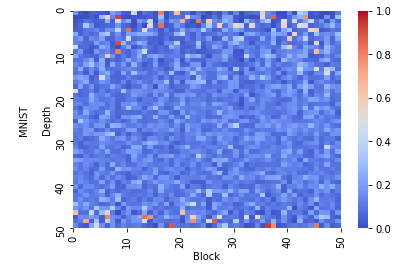

In [33]:
singleSample=tf.reshape(data[0],(1,28,28))
transformGateOutputHeatMap(highwayNetwork.model,singleSample,"MNIST")

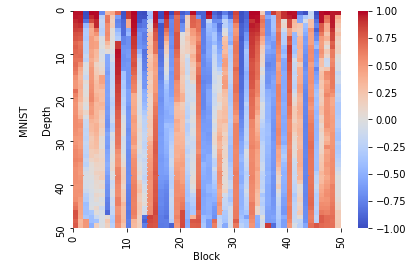

In [34]:
blockOutputHeatmap(highwayNetwork.model,singleSample,"MNIST")

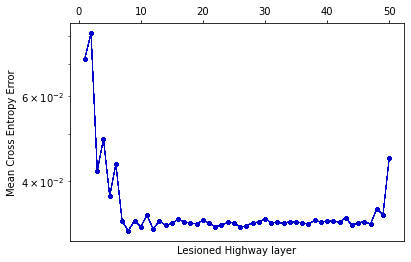

In [35]:
lossArray=plotLesionedGraph(highwayNetwork.model,label,data)